### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [3]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('data/cleaned_data.csv')

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.15 μs


In [4]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [6]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location

In [7]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

'\nNow you need to start the MLflow server in a new terminal. \nNote: Before you start the MLflow server, create a folder named mlruns in the assignment directory.\nNow you need to run the command to start MLflow server such that:\n1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.\n2. mlruns folder is used as an artifact directory. \n3. The server runs on the port 6006.\n\nThe steps to do so are as follows:\nOpen a new terminal.\nThen go to the Assignment directory using the cd command. Type the command: cd Assignment/\nCreate a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns\nThen, type the following command to start the MLflow server: \nmlflow server --backend-store-uri=\'sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db\' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0\n'

In [2]:
!mlflow server --backend-store-uri='sqlite:///./lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0

[2024-08-14 16:35:37 +0700] [60730] [INFO] Starting gunicorn 22.0.0
[2024-08-14 16:35:37 +0700] [60730] [INFO] Listening at: http://0.0.0.0:6006 (60730)
[2024-08-14 16:35:37 +0700] [60730] [INFO] Using worker: sync
[2024-08-14 16:35:37 +0700] [60731] [INFO] Booting worker with pid: 60731
[2024-08-14 16:35:37 +0700] [60732] [INFO] Booting worker with pid: 60732
[2024-08-14 16:35:37 +0700] [60733] [INFO] Booting worker with pid: 60733
[2024-08-14 16:35:37 +0700] [60734] [INFO] Booting worker with pid: 60734
2024/08/14 17:01:52 ERROR mlflow.server: Exception on /get-artifact [GET]
Traceback (most recent call last):
  File "/Users/geotech/Documents/max/upgrad/mlops_assignment/.venv/lib/python3.10/site-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/geotech/Documents/max/upgrad/mlops_assignment/.venv/lib/python3.10/site-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/ge

In [ ]:
# Once, your server is successfully running, create a mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri("http://0.0.0.0:6006")

In [10]:
# setup pycaret 
Baseline_model_exp_01 = setup(data = dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   n_jobs=-1,use_gpu=False,
                   log_experiment=True, experiment_name='Baseline_model_exp_01',
                   log_plots=True, log_data=True,
                   verbose=True,log_profile=False)

,Description,Value
0,Session id,42
1,Target,app_complete_flag
2,Target type,Binary
3,Original data shape,"(238964, 12)"
4,Transformed data shape,"(238964, 44)"
5,Transformed train set shape,"(167274, 44)"
6,Transformed test set shape,"(71690, 44)"
7,Numeric features,8
8,Categorical features,3
9,Preprocess,True


### 4 : Model Experimentation with pycaret

In [11]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
best_model = compare_models(fold = 10, exclude= ['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7386,0.8206,0.8346,0.7014,0.7622,0.4767,0.4856,0.8080
rf,Random Forest Classifier,0.7379,0.8181,0.8211,0.7053,0.7588,0.4754,0.4820,1.2280
et,Extra Trees Classifier,0.7371,0.8172,0.8196,0.7049,0.7579,0.4739,0.4804,1.5520
dt,Decision Tree Classifier,0.7369,0.8166,0.8192,0.7047,0.7577,0.4735,0.4799,0.1860
lr,Logistic Regression,0.7091,0.7829,0.8196,0.6726,0.7388,0.4176,0.4281,0.6900
ridge,Ridge Classifier,0.6995,0.7726,0.7943,0.6691,0.7264,0.3986,0.4058,0.1760
lda,Linear Discriminant Analysis,0.6995,0.7726,0.7943,0.6691,0.7264,0.3986,0.4058,0.3290
nb,Naive Bayes,0.6639,0.7335,0.8708,0.6175,0.7222,0.3267,0.3599,0.2040


2024/08/13 21:59:02 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 21:59:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://0.0.0.0:6006/#/experiments/1/runs/6fd564496509468b8500e7c607266b25.
2024/08/13 21:59:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/1.
2024/08/13 21:59:02 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 21:59:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Classifier at: http://0.0.0.0:6006/#/experiments/1/runs/7db94b4fac7c4aa08e2b90bb118c2e3f.
2024/08/13 21:59:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/1.
2024/08/13 21:59:03 WARNING mlflow.mo

In [12]:
# create a model which gives the highest accuracy
lgbm  = create_model('lightgbm', fold = 5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7419,0.8214,0.8383,0.7040,0.7653,0.4833,0.4924
1,0.7380,0.8212,0.8276,0.7031,0.7603,0.4756,0.4833
2,0.7376,0.8202,0.8338,0.7006,0.7614,0.4749,0.4838
3,0.7371,0.8185,0.8281,0.7019,0.7598,0.4739,0.4818
4,0.7375,0.8203,0.8364,0.6995,0.7619,0.4746,0.4841
Mean,0.7384,0.8203,0.8328,0.7018,0.7617,0.4765,0.4851
Std,0.0017,0.0010,0.0043,0.0016,0.0019,0.0035,0.0038


2024/08/13 21:59:11 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 21:59:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://0.0.0.0:6006/#/experiments/1/runs/e2b830d087e2407d8482eb2baea87813.
2024/08/13 21:59:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/1.


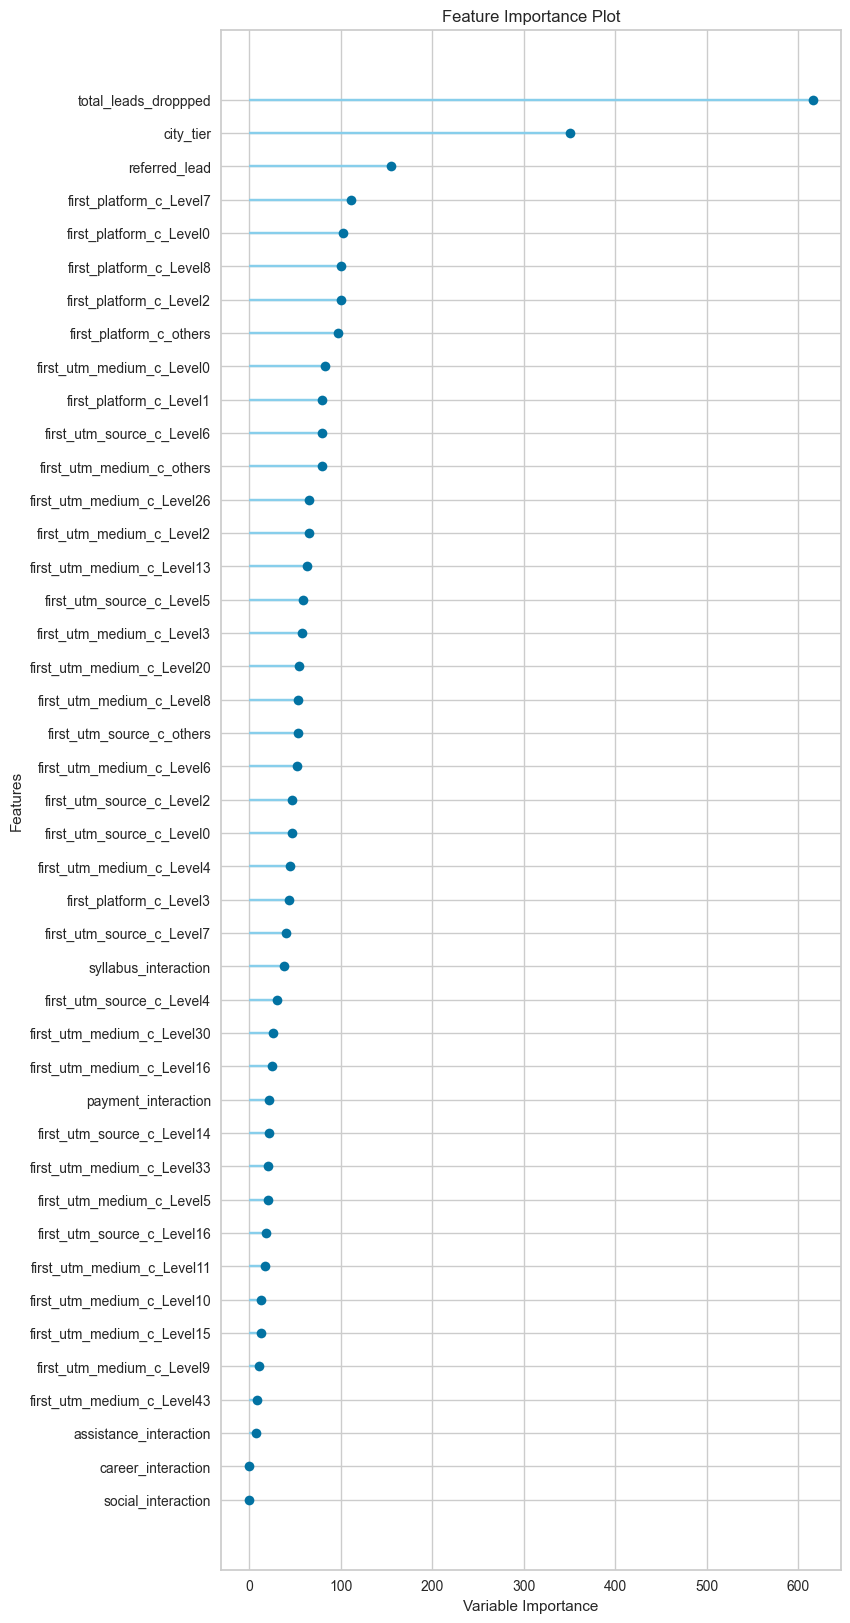

In [13]:
# create feature importance plot
plot_model(lgbm, plot='feature_all')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [14]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
final_dataset = dataset[['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']]

# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.
Baseline_model_exp_02 = setup(data = final_dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   n_jobs=-1,use_gpu=False,
                   log_plots=True, log_data=True,
                   verbose=True,log_profile=False,
                   log_experiment=True,experiment_name='Baseline_model_exp_02',
                   normalize = False ,  transformation = False)

,Description,Value
0,Session id,42
1,Target,app_complete_flag
2,Target type,Binary
3,Original data shape,"(238964, 7)"
4,Transformed data shape,"(238964, 39)"
5,Transformed train set shape,"(167274, 39)"
6,Transformed test set shape,"(71690, 39)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [15]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 
best_model = compare_models(fold = 10, exclude= ['gbc','knn','qda', 'dummy', 'svm', 'ada'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7383,0.8205,0.8334,0.7015,0.7618,0.4762,0.4849,0.6710
rf,Random Forest Classifier,0.7379,0.8181,0.8213,0.7052,0.7588,0.4754,0.4820,1.2560
et,Extra Trees Classifier,0.7371,0.8173,0.8199,0.7048,0.7580,0.4739,0.4805,1.4100
dt,Decision Tree Classifier,0.7370,0.8166,0.8195,0.7047,0.7578,0.4736,0.4801,0.1850
lr,Logistic Regression,0.7092,0.7827,0.8193,0.6728,0.7388,0.4178,0.4282,0.2500
ridge,Ridge Classifier,0.6993,0.7720,0.7939,0.6690,0.7261,0.3980,0.4053,0.1880
lda,Linear Discriminant Analysis,0.6993,0.7720,0.7939,0.6689,0.7261,0.3980,0.4052,0.2580
nb,Naive Bayes,0.6714,0.7336,0.8553,0.6265,0.7233,0.3417,0.3674,0.1980


2024/08/13 22:00:01 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 22:00:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://0.0.0.0:6006/#/experiments/2/runs/d0b314e2cc6841a3a74c9fef58085d70.
2024/08/13 22:00:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/2.
2024/08/13 22:00:01 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 22:00:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Classifier at: http://0.0.0.0:6006/#/experiments/2/runs/1fe18499402f452aa4052d76c8894912.
2024/08/13 22:00:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/2.
2024/08/13 22:00:01 WARNING mlflow.mo

In [16]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret
lgbm  = create_model('lightgbm', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7449,0.8234,0.8426,0.7060,0.7683,0.4893,0.4988
1,0.7382,0.8195,0.8372,0.7001,0.7625,0.4760,0.4855
2,0.7360,0.8183,0.8312,0.6995,0.7596,0.4715,0.4802
3,0.7393,0.8248,0.8286,0.7044,0.7614,0.4782,0.4859
4,0.7392,0.8231,0.8345,0.7022,0.7627,0.4780,0.4868
5,0.7356,0.8180,0.8278,0.7002,0.7587,0.4707,0.4788
6,0.7370,0.8172,0.8389,0.6981,0.7621,0.4736,0.4836
7,0.7377,0.8198,0.8236,0.7042,0.7592,0.4751,0.4821
8,0.7350,0.8170,0.8339,0.6975,0.7596,0.4696,0.4790


2024/08/13 22:00:12 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 22:00:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://0.0.0.0:6006/#/experiments/2/runs/d99bc3d19ae445d987a0cf5e780cdc83.
2024/08/13 22:00:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/2.


In [17]:
!pip install optuna
!pip install optuna-integration

In [23]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC
tuned_lgbm_optuna,tuner = tune_model(lgbm, 
                                    search_library='optuna',
                                    search_algorithm='tpe',
                                    fold = 10,
                                    optimize = 'AUC',
                                    choose_better=True,
                                    return_tuner=True,
                                    early_stopping=True,
                                    n_iter=10,return_train_score=True)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6614372008231946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6614372008231946
[LightGBM] [Warning] bagging_fraction is set=0.9860807191960617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9860807191960617
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47626873965007654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47626873965007654
[LightGBM] [Warning] bagging_fraction is set=0.6331037276782766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6331037276782766
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6614372008231946, colsamp

2024/08/13 22:37:58 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/13 22:37:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://0.0.0.0:6006/#/experiments/2/runs/d238bc4beba14589a3b801d2d4d6aa86.
2024/08/13 22:37:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://0.0.0.0:6006/#/experiments/2.


In [ ]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
print(tuner)
print("**"*30)
print(tuned_lgbm_optuna)